<a href="https://colab.research.google.com/github/JimKing100/SF_Real_Estate_Project/blob/master/National_Salary_vs_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math

# Load the tech income data
salary_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/RankedTechIncome.csv')

# Check the data
print(salary_data.shape)
salary_data.head()

(385, 23)


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,CA,41940,"San Jose-Sunnyvale-Santa Clara, CA",15-0000,Computer and Mathematical Occupations,major,"141,030",2.3,126.011,4.16,61.08,127040,1.3,32.32,44.19,59.36,75.94,92.45,"67,220","91,910","123,470","157,940","192,300"
1,CA,41860,"San Francisco-Oakland-Hayward, CA",15-0000,Computer and Mathematical Occupations,major,"146,420",2.7,60.525,2,58.04,120730,1.9,31.04,41.69,56.18,71.77,86.49,"64,570","86,710","116,860","149,270","179,900"
2,WA,42660,"Seattle-Tacoma-Bellevue, WA",15-0000,Computer and Mathematical Occupations,major,"139,440",9,70.269,2.32,54.69,113750,6.0,27.98,39.30,54.15,68.71,80.83,"58,200","81,730","112,640","142,920","168,140"
3,DC,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",15-0000,Computer and Mathematical Occupations,major,"232,290",1.7,74.093,2.45,51.81,107760,0.7,28.20,37.27,50.96,64.66,77.77,"58,660","77,520","106,000","134,500","161,750"
4,NH,76900,"Portsmouth, NH-ME",15-0000,Computer and Mathematical Occupations,major,"4,050",3.6,42.949,1.42,50.15,104310,4.4,26.89,35.39,47.64,60.89,74.60,"55,930","73,620","99,090","126,640","155,160"


In [2]:
# Load the tech income data
initial_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/SF_Real_Estate_Project/master/data/2018MedianHomes-Final.csv')

housing_data = initial_data.rename(columns={'CBSA Code': 'AREA'})

# Check the data
print(housing_data.shape)
housing_data.head()

(180, 5)


,AREA,Metro Area,2016,2017,2018
0,19500,"Decatur, IL",93.3,94.4,90.8
1,49660,"Youngstown-Warren-Boardman, OH-PA",84.4,86.1,94.0
2,19060,"Cumberland, MD-WV",88.8,90.7,100.5
3,21300,"Elmira, NY",116.1,110.4,111.2
4,21500,"Erie, PA",114.9,115.7,118.7


In [3]:
merged_data = pd.merge(salary_data,
                       housing_data,
                       on='AREA')
merged_data.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Metro Area,2016,2017,2018
0,CA,41940,"San Jose-Sunnyvale-Santa Clara, CA",15-0000,Computer and Mathematical Occupations,major,"141,030",2.3,126.011,4.16,61.08,127040,1.3,32.32,44.19,59.36,75.94,92.45,"67,220","91,910","123,470","157,940","192,300","San Jose-Sunnyvale-Santa Clara, CA",1020.5,1180.0,1340.0
1,CA,41860,"San Francisco-Oakland-Hayward, CA",15-0000,Computer and Mathematical Occupations,major,"146,420",2.7,60.525,2,58.04,120730,1.9,31.04,41.69,56.18,71.77,86.49,"64,570","86,710","116,860","149,270","179,900","San Francisco-Oakland-Hayward, CA",828.0,900.0,987.5
2,WA,42660,"Seattle-Tacoma-Bellevue, WA",15-0000,Computer and Mathematical Occupations,major,"139,440",9,70.269,2.32,54.69,113750,6.0,27.98,39.30,54.15,68.71,80.83,"58,200","81,730","112,640","142,920","168,140","Seattle-Tacoma-Bellevue, WA",414.5,465.8,501.4
3,DC,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",15-0000,Computer and Mathematical Occupations,major,"232,290",1.7,74.093,2.45,51.81,107760,0.7,28.20,37.27,50.96,64.66,77.77,"58,660","77,520","106,000","134,500","161,750","Washington-Arlington-Alexandria, DC-VA-MD-WV",390.6,406.7,424.0
4,NY,35620,"New York-Newark-Jersey City, NY-NJ-PA",15-0000,Computer and Mathematical Occupations,major,"305,470",1.4,32.16,1.06,49.98,103960,0.8,24.89,33.95,47.15,63.10,78.90,"51,760","70,610","98,070","131,260","164,110","New York-Newark-Jersey City, NY-NJ-PA",388.5,404.3,410.0


In [4]:
temp_df = pd.DataFrame(merged_data, columns = ['AREA' , 'Metro Area', '2018' , 'A_MEAN'])
temp_df.head()

,AREA,Metro Area,2018,A_MEAN
0,41940,"San Jose-Sunnyvale-Santa Clara, CA",1340.0,127040
1,41860,"San Francisco-Oakland-Hayward, CA",987.5,120730
2,42660,"Seattle-Tacoma-Bellevue, WA",501.4,113750
3,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",424.0,107760
4,35620,"New York-Newark-Jersey City, NY-NJ-PA",410.0,103960


In [5]:
final_df = temp_df.rename(columns={'AREA': 'cbsa_code', 'Metro Area': 'metro_area',
                                   '2018': 'median_home_price', 'A_MEAN': 'tech_salary'})
final_df.head()

,cbsa_code,metro_area,median_home_price,tech_salary
0,41940,"San Jose-Sunnyvale-Santa Clara, CA",1340.0,127040
1,41860,"San Francisco-Oakland-Hayward, CA",987.5,120730
2,42660,"Seattle-Tacoma-Bellevue, WA",501.4,113750
3,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",424.0,107760
4,35620,"New York-Newark-Jersey City, NY-NJ-PA",410.0,103960


In [6]:
final_df.loc[:,'median_home_price'] *= 1000
final_df = final_df.astype({'median_home_price': 'int'})
final_df.head()

,cbsa_code,metro_area,median_home_price,tech_salary
0,41940,"San Jose-Sunnyvale-Santa Clara, CA",1340000,127040
1,41860,"San Francisco-Oakland-Hayward, CA",987500,120730
2,42660,"Seattle-Tacoma-Bellevue, WA",501400,113750
3,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",424000,107760
4,35620,"New York-Newark-Jersey City, NY-NJ-PA",410000,103960


In [7]:
# Function to calculate the monthly housing payment (PITI)
def minimum_income(median_price):
    int_rate = .04
    term = 30
    down_pmt = .20
    principal_pmt = median_price * (1 - down_pmt)
    
    # Calculate insurance and taxes
    tax_pmt = (median_price * .01) / 12
    insurance_pmt = (median_price * .0038) / 12
    
    # monthly rate from annual percentage rate
    interest_rate = int_rate/(100 * 12)
    
    # total number of payments
    payment_num = term * 12
    
    # calculate monthly mortgage payment
    mortgage_pmt = principal_pmt * (interest_rate * (math.pow((1 + interest_rate), (payment_num))) / 
                               (math.pow((1 + interest_rate), (payment_num)) - 1))
    payment = mortgage_pmt + tax_pmt + insurance_pmt
    min_income = (payment / .30) * 12
    
    return min_income

final_df['min_income'] = final_df.apply(lambda x: minimum_income(x['median_home_price']), axis=1)
final_df = final_df.astype({'min_income': 'int'})
final_df.head(20)

,cbsa_code,metro_area,median_home_price,tech_salary,min_income
0,41940,"San Jose-Sunnyvale-Santa Clara, CA",1340000,127040,181469
1,41860,"San Francisco-Oakland-Hayward, CA",987500,120730,133731
2,42660,"Seattle-Tacoma-Bellevue, WA",501400,113750,67901
3,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",424000,107760,57420
4,35620,"New York-Newark-Jersey City, NY-NJ-PA",410000,103960,55524
5,12580,"Baltimore-Columbia-Towson, MD",285600,101510,38677
6,14500,"Boulder, CO",607400,101220,82257
7,41740,"San Diego-Carlsbad, CA",634000,99890,85859
8,19740,"Denver-Aurora-Lakewood, CO",449900,98460,60927
9,26620,"Huntsville, AL",205400,97340,27816


In [8]:
final_df['differential'] = final_df.apply(lambda x: x['tech_salary'] - x['min_income'], axis=1)
final_df.head(20)

,cbsa_code,metro_area,median_home_price,tech_salary,min_income,differential
0,41940,"San Jose-Sunnyvale-Santa Clara, CA",1340000,127040,181469,-54429
1,41860,"San Francisco-Oakland-Hayward, CA",987500,120730,133731,-13001
2,42660,"Seattle-Tacoma-Bellevue, WA",501400,113750,67901,45849
3,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",424000,107760,57420,50340
4,35620,"New York-Newark-Jersey City, NY-NJ-PA",410000,103960,55524,48436
5,12580,"Baltimore-Columbia-Towson, MD",285600,101510,38677,62833
6,14500,"Boulder, CO",607400,101220,82257,18963
7,41740,"San Diego-Carlsbad, CA",634000,99890,85859,14031
8,19740,"Denver-Aurora-Lakewood, CO",449900,98460,60927,37533
9,26620,"Huntsville, AL",205400,97340,27816,69524


In [9]:
area_dict = {"San Jose-Sunnyvale-Santa Clara, CA": "San Jose, CA", "San Francisco-Oakland-Hayward, CA": "San Francisco, CA",
             "Seattle-Tacoma-Bellevue, WA": "Seattle, WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV": "Washington, DC",
             "New York-Newark-Jersey City, NY-NJ-PA": "New York, NY", "Baltimore-Columbia-Towson, MD": "Baltimore, MD",
             "San Diego-Carlsbad, CA": "San Diego, CA", "Denver-Aurora-Lakewood, CO": "Denver, CO", 
             "Houston-The Woodlands-Sugar Land, TX": "Houston, TX", "Dallas-Fort Worth-Arlington, TX": "Dallas, TX",
             "Austin-Round Rock, TX": "Austin, TX", "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD": "Philadelphia, PA", 
             "Durham-Chapel Hill, NC": "Durham, NC", "Atlanta-Sandy Springs-Marietta, GA": "Atlanta, GA"
            }

final_df = final_df.replace({'metro_area': area_dict})
final_df.head(20)

,cbsa_code,metro_area,median_home_price,tech_salary,min_income,differential
0,41940,"San Jose, CA",1340000,127040,181469,-54429
1,41860,"San Francisco, CA",987500,120730,133731,-13001
2,42660,"Seattle, WA",501400,113750,67901,45849
3,47900,"Washington, DC",424000,107760,57420,50340
4,35620,"New York, NY",410000,103960,55524,48436
5,12580,"Baltimore, MD",285600,101510,38677,62833
6,14500,"Boulder, CO",607400,101220,82257,18963
7,41740,"San Diego, CA",634000,99890,85859,14031
8,19740,"Denver, CO",449900,98460,60927,37533
9,26620,"Huntsville, AL",205400,97340,27816,69524


In [10]:
top_salaries = final_df.sort_values(by=['tech_salary'], ascending=False)[:20]
top_salaries.head(20)

,cbsa_code,metro_area,median_home_price,tech_salary,min_income,differential
0,41940,"San Jose, CA",1340000,127040,181469,-54429
1,41860,"San Francisco, CA",987500,120730,133731,-13001
2,42660,"Seattle, WA",501400,113750,67901,45849
3,47900,"Washington, DC",424000,107760,57420,50340
4,35620,"New York, NY",410000,103960,55524,48436
5,12580,"Baltimore, MD",285600,101510,38677,62833
6,14500,"Boulder, CO",607400,101220,82257,18963
7,41740,"San Diego, CA",634000,99890,85859,14031
8,19740,"Denver, CO",449900,98460,60927,37533
9,26620,"Huntsville, AL",205400,97340,27816,69524


In [11]:
metro_area = top_salaries['metro_area'].values.tolist()
print(metro_area)
salary = top_salaries['tech_salary'].values.tolist()
print(salary)

['San Jose, CA', 'San Francisco, CA', 'Seattle, WA', 'Washington, DC', 'New York, NY', 'Baltimore, MD', 'Boulder, CO', 'San Diego, CA', 'Denver, CO', 'Huntsville, AL', 'Colorado Springs, CO', 'Houston, TX', 'Trenton, NJ', 'Dallas, TX', 'Columbus, OH', 'Austin, TX', 'Philadelphia, PA', 'Durham, NC', 'Raleigh, NC', 'Atlanta, GA']
[127040, 120730, 113750, 107760, 103960, 101510, 101220, 99890, 98460, 97340, 95690, 95520, 94190, 93820, 92440, 91970, 91820, 91740, 91680, 91220]


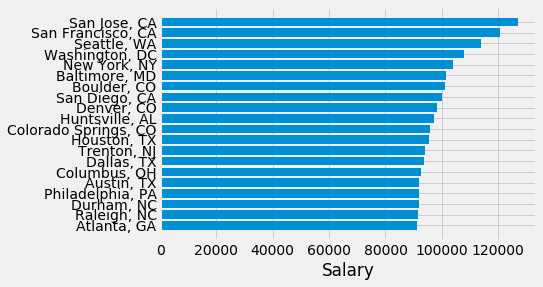

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

areas = np.arange(len(metro_area))
y_pos = areas[::-1]

plt.barh(y_pos, salary)
plt.yticks(y_pos, metro_area)
plt.xlabel('Salary')

plt.show()

Text(0, 22, 'Source: Bureau of Labor Statistics, 2018')

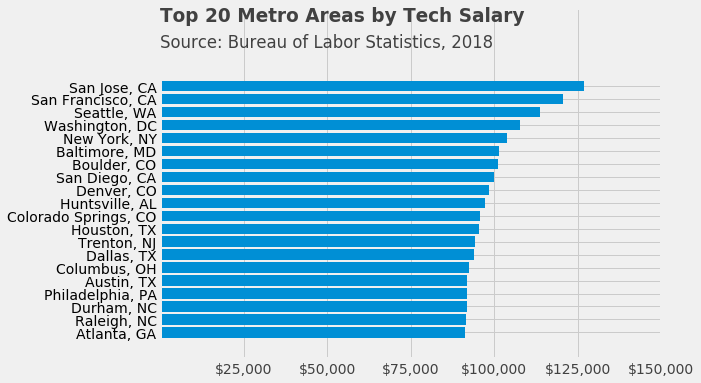

In [13]:
plt.style.use('fivethirtyeight')

# Setting size of our plot
fig, ax = plt.subplots(figsize=(8,6))

areas = np.arange(len(metro_area))
y_pos = areas[::-1]

# Plot the data
plt.barh(y_pos, salary)

# Y axis past 0 & above 20 -- grid line will pass 0 & 20 marker
plt.ylim(-2,25)
plt.xlim(-10, 150000)

# Y-labels to only these
plt.yticks(y_pos, metro_area);

# X-labels and changing label names
ax.set_xticks([25000, 50000, 75000, 100000, 125000, 150000])
ax.set_xticklabels(['$25,000', '$50,000', '$75,000', '$100,000', '$125,000', '$150,000'], fontsize=14, color='#414141')

# Title text
ax.text(x=0, y=24, s="Top 20 Metro Areas by Tech Salary", fontsize=18.5, fontweight='semibold', color='#414141')

# Subtitle text
ax.text(x=0, y=22, s='Source: Bureau of Labor Statistics, 2018', fontsize=16.5, color='#414141')


In [14]:
top_salaries = final_df.sort_values(by=['tech_salary'], ascending=False)[:20]
top_salaries.head(20)

,cbsa_code,metro_area,median_home_price,tech_salary,min_income,differential
0,41940,"San Jose, CA",1340000,127040,181469,-54429
1,41860,"San Francisco, CA",987500,120730,133731,-13001
2,42660,"Seattle, WA",501400,113750,67901,45849
3,47900,"Washington, DC",424000,107760,57420,50340
4,35620,"New York, NY",410000,103960,55524,48436
5,12580,"Baltimore, MD",285600,101510,38677,62833
6,14500,"Boulder, CO",607400,101220,82257,18963
7,41740,"San Diego, CA",634000,99890,85859,14031
8,19740,"Denver, CO",449900,98460,60927,37533
9,26620,"Huntsville, AL",205400,97340,27816,69524


In [15]:
salary_rank_df = top_salaries.drop(['median_home_price', 'min_income', 'differential'], axis=1)
salary_rank_df.head(20)

,cbsa_code,metro_area,tech_salary
0,41940,"San Jose, CA",127040
1,41860,"San Francisco, CA",120730
2,42660,"Seattle, WA",113750
3,47900,"Washington, DC",107760
4,35620,"New York, NY",103960
5,12580,"Baltimore, MD",101510
6,14500,"Boulder, CO",101220
7,41740,"San Diego, CA",99890
8,19740,"Denver, CO",98460
9,26620,"Huntsville, AL",97340


In [16]:
salary_dict = {'cbsa_code': 'Rank', 'metro_area': 'Metro Area', 'tech_salary': 'Average Tech Salary'}
salary_rank_df = salary_rank_df.rename(columns=salary_dict)
salary_rank_df.head(20)

,Rank,Metro Area,Average Tech Salary
0,41940,"San Jose, CA",127040
1,41860,"San Francisco, CA",120730
2,42660,"Seattle, WA",113750
3,47900,"Washington, DC",107760
4,35620,"New York, NY",103960
5,12580,"Baltimore, MD",101510
6,14500,"Boulder, CO",101220
7,41740,"San Diego, CA",99890
8,19740,"Denver, CO",98460
9,26620,"Huntsville, AL",97340


In [17]:
!pip install plotly==4.1.0

     |████████████████████████████████| 7.1MB 5.0MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [28]:
import plotly.graph_objects as go
import pandas as pd

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
    #columnwidth = [5,20,10],
    header=dict(values=list(salary_rank_df.columns),
                line_color='black',
                fill_color='grey',
                align='left',
                font=dict(color='white', size=12)
    ),
    cells=dict(values=[salary_rank_df['Rank'], salary_rank_df['Metro Area'], salary_rank_df['Average Tech Salary']],
               line_color='black',
               fill_color='white',
               align='left'))
])

fig.show()